# Karakteristik Data Penelitian

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import gdown
import pandas as pd

# ID file Google Drive
file_id = "1wss68hiKoC7RkWm4_QDxe0k0KqkemcnM"
url = f"https://drive.google.com/uc?id={file_id}"

# Nama file lokal
output = "anin_wearemania_dashboard.csv"

# Download file
gdown.download(url, output, quiet=False)

# Membaca CSV
df = pd.read_csv(output,)

Downloading...
From: https://drive.google.com/uc?id=1wss68hiKoC7RkWm4_QDxe0k0KqkemcnM
To: /content/anin_wearemania_dashboard.csv
100%|██████████| 4.12k/4.12k [00:00<00:00, 9.68MB/s]


In [ ]:
# Tampilkan 5 baris pertama dari dataset
df.head()

,Date,Direct,Organic search,Organic social,Referral,Unassigned,Display,Paid Search,Revenue
0,"Feb 1, 2025","1,122",888,11,2,0,0,0,"5,987"
1,"Feb 2, 2025",286,473,13,2,0,0,0,"4,080"
2,"Feb 3, 2025",240,643,60,2,0,0,0,"3,503"
3,"Feb 4, 2025",186,575,75,7,1,0,0,"4,282"
4,"Feb 5, 2025",257,512,50,1,0,0,0,"3,273"


In [ ]:
# Konversi kolom numerik bertipe objek ke numerik (hapus koma, ubah ke int)
for col in ['Direct', 'Organic search', 'Revenue']:
    df[col] = df[col].str.replace(',', '').astype(float)

In [ ]:
# Tampilkan 5 baris pertama dari dataset
df.head()

,Date,Direct,Organic search,Organic social,Referral,Unassigned,Display,Paid Search,Revenue
0,"Feb 1, 2025",1122.0,888.0,11,2,0,0,0,5987.0
1,"Feb 2, 2025",286.0,473.0,13,2,0,0,0,4080.0
2,"Feb 3, 2025",240.0,643.0,60,2,0,0,0,3503.0
3,"Feb 4, 2025",186.0,575.0,75,7,1,0,0,4282.0
4,"Feb 5, 2025",257.0,512.0,50,1,0,0,0,3273.0


In [ ]:
print(df.columns)

Index(['Date', 'Direct', 'Organic search', 'Organic social', 'Referral',
       'Unassigned', 'Display', 'Paid Search', 'Revenue'],
      dtype='object')


In [ ]:
# Pastikan kolom Date dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Urutkan berdasarkan tanggal
df = df.sort_values('Date')

# Set kolom Date sebagai index
df.set_index('Date', inplace=True)

## Menggambarkan time series plot dan mendiskripsikan data

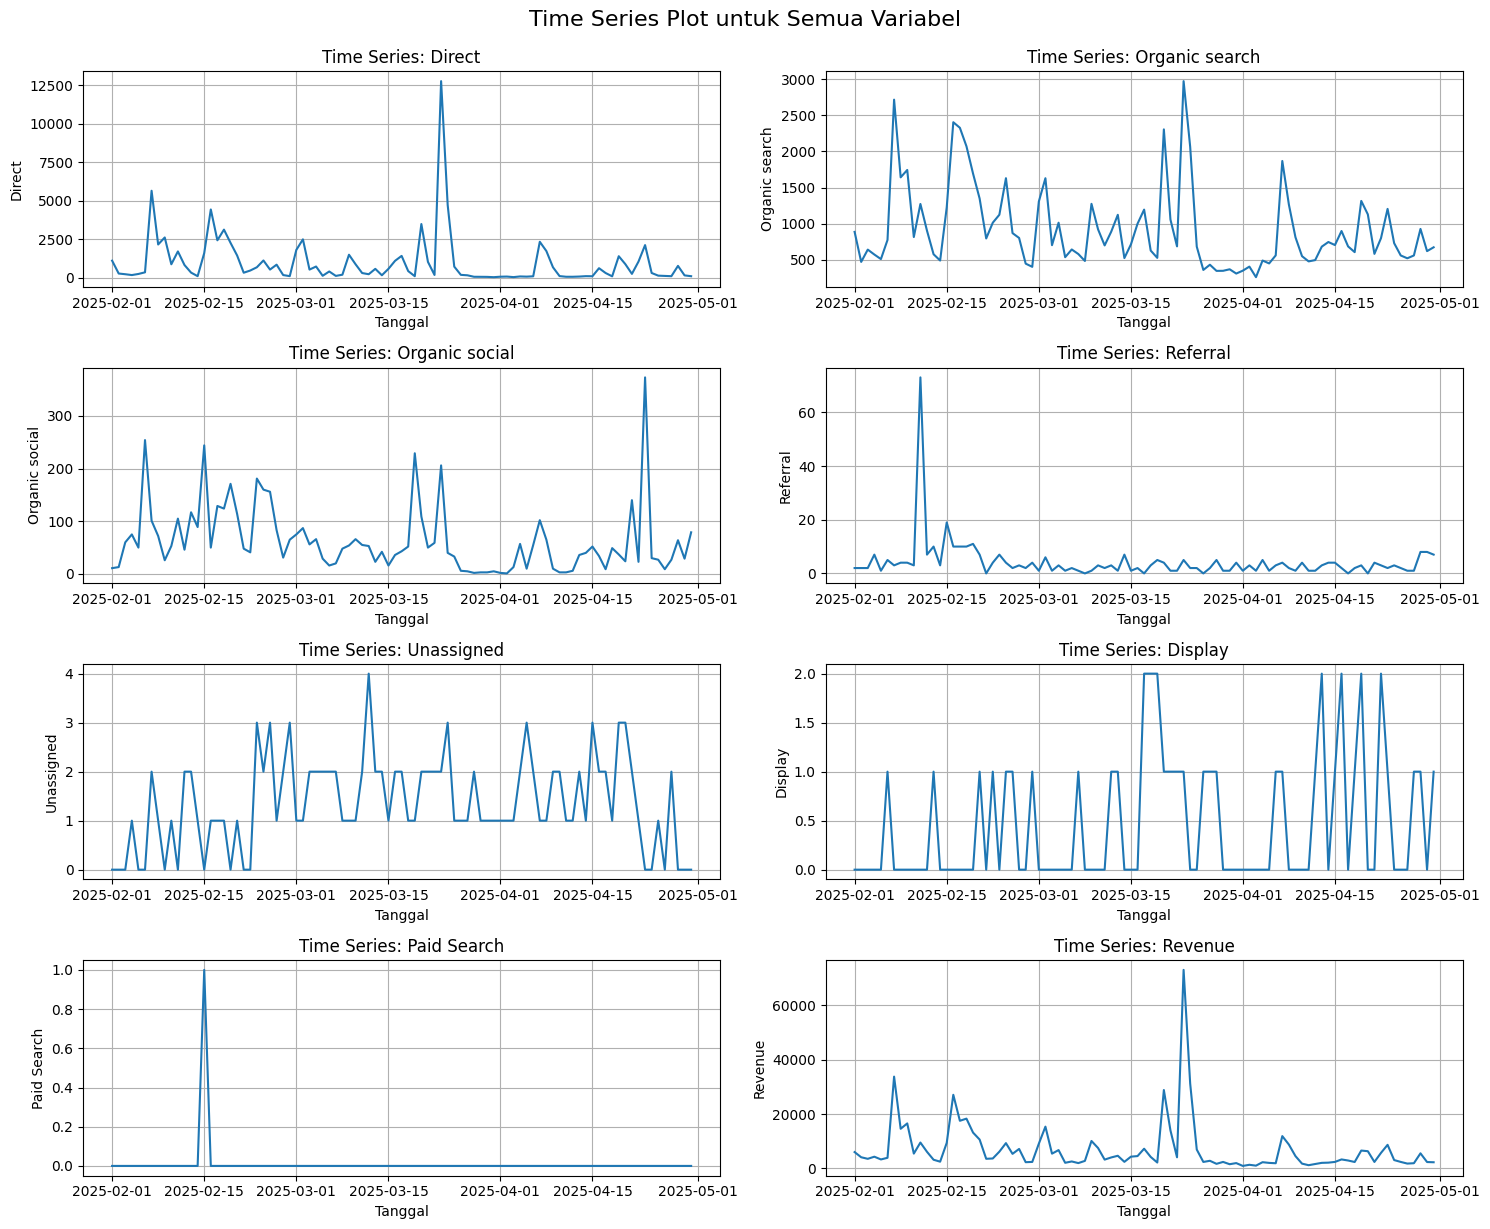

In [ ]:
# Plot semua kolom (kecuali Date yang sudah jadi index)
plt.figure(figsize=(15, 12))

# Hitung jumlah subplot (misal 8 kolom)
columns_to_plot = df.columns  # semua kolom numerik
n = len(columns_to_plot)

# Buat subplots untuk tiap kolom
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot((n + 1) // 2, 2, i)  # susun 2 kolom per baris
    plt.plot(df.index, df[col], label=col)
    plt.title(f"Time Series: {col}")
    plt.xlabel("Tanggal")
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()

plt.suptitle("Time Series Plot untuk Semua Variabel", fontsize=16, y=1.02)
plt.show()

In [ ]:
# Statistik deskriptif untuk semua variabel
desc_stats = df.describe()
print("Statistik Deskriptif Semua Variabel:\n")
print(desc_stats)

Statistik Deskriptif Semua Variabel:

             Direct  Organic search  Organic social   Referral  Unassigned  \
count     89.000000       89.000000       89.000000  89.000000   89.000000   
mean     994.674157      927.606742       63.651685   4.202247    1.348315   
std     1676.584934      570.853659       64.976237   7.994572    0.930556   
min       49.000000      262.000000        1.000000   0.000000    0.000000   
25%      130.000000      538.000000       23.000000   1.000000    1.000000   
50%      364.000000      716.000000       49.000000   3.000000    1.000000   
75%     1122.000000     1130.000000       75.000000   4.000000    2.000000   
max    12780.000000     2972.000000      373.000000  73.000000    4.000000   

         Display  Paid Search       Revenue  
count  89.000000    89.000000     89.000000  
mean    0.449438     0.011236   7028.213483  
std     0.639802     0.106000   9676.557834  
min     0.000000     0.000000    886.000000  
25%     0.000000     0.000000

# Melakukan analisis regresi time series

## Melakukan estimasi parameter model regresi time series

In [ ]:
# Revenue sebagai variabel dependen
y = df['Revenue']

# Semua variabel lain sebagai prediktor (X)
X = df.drop(columns='Revenue')

In [ ]:
import statsmodels.api as sm

# Tambahkan konstanta (intercept)
X_with_const = sm.add_constant(X)

# Estimasi model OLS (ordinary least squares)
model = sm.OLS(y, X_with_const).fit()

# Tampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     443.8
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           8.31e-62
Time:                        13:15:16   Log-Likelihood:                -779.15
No. Observations:                  89   AIC:                             1574.
Df Residuals:                      81   BIC:                             1594.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            489.3155    503.958      0.

Model regresi menghasilkan:

* R-squared (R²) sebesar 0.975, dan
* Adjusted R² sebesar 0.972.

Artinya, 97.2% variasi pada variabel Revenue dapat dijelaskan oleh kombinasi dari variabel-variabel independen dalam model (Direct, Organic Search, dsb). Ini menunjukkan model memiliki daya jelaskan yang sangat kuat.

In [ ]:
# Ekstrak koefisien dari model
params = model.params

# Tampilkan dalam bentuk tabel
print("\nHasil estimasi parameter")
print("Variabel\t\tKoefisien")
print("-" * 30)
for var, coef in params.items():
    print(f"{var:<16}\t{coef:.4f}")


Hasil estimasi parameter
Variabel		Koefisien
------------------------------
const           	489.3155
Direct          	5.3901
Organic search  	1.1362
Organic social  	-1.9959
Referral        	-14.7288
Unassigned      	298.8003
Display         	-190.3064
Paid Search     	-432.8403


## Menguji secara serentak pengaruh variabel independen terhadap variabel dependen menggunakan uji F. Apabila nilai signifikansi atau p-value kurang dari 5% maka variabel independen berpengaruh secara serentak terhadap variabel dependen

In [ ]:
# Tampilkan hasil uji F (uji simultan)
print("\nHasil Uji F (Simultan)")
print(f"F-Statistic : {model.fvalue:.2f}")
print(f"P-Value     : {model.f_pvalue:.4f}")

if model.f_pvalue < 0.05:
    print("Kesimpulan: Variabel independen berpengaruh secara simultan terhadap Revenue.")
else:
    print("Kesimpulan: Tidak ada pengaruh simultan yang signifikan.")


Hasil Uji F (Simultan)
F-Statistic : 443.78
P-Value     : 0.0000
Kesimpulan: Variabel independen berpengaruh secara simultan terhadap Revenue.


Karena p-value < 0.05, maka secara simultan seluruh variabel independen berpengaruh signifikan terhadap Revenue.

## Melakukan uji t untuk mengetahui secara parsial pengaruh variabel independen terhadap variabel dependen. Apabila nilai signifikansi atau p-value kurang dari 5% maka variabel independen berpengaruh secara parsial terhadap variabel dependen. Pengujian dilakukan setiap variabel independen

In [ ]:
# Uji t: koefisien, t-stat, dan p-value
print("\nHasil Uji t (Parsial)")
print(f"{'Variabel':<20} {'Koefisien':>10} {'t-Stat':>10} {'P-Value':>10} {'Signifikan?':>12}")
print("-" * 70)

for var in model.params.index:
    coef = model.params[var]
    tval = model.tvalues[var]
    pval = model.pvalues[var]
    signif = "Ya" if pval < 0.05 else "Tidak"
    print(f"{var:<20} {coef:10.4f} {tval:10.2f} {pval:10.4f} {signif:>12}")


Hasil Uji t (Parsial)
Variabel              Koefisien     t-Stat    P-Value  Signifikan?
----------------------------------------------------------------------
const                  489.3155       0.97     0.3345        Tidak
Direct                   5.3901      26.93     0.0000           Ya
Organic search           1.1362       1.88     0.0642        Tidak
Organic social          -1.9959      -0.63     0.5336        Tidak
Referral               -14.7288      -0.64     0.5243        Tidak
Unassigned             298.8003       1.52     0.1317        Tidak
Display               -190.3064      -0.67     0.5043        Tidak
Paid Search           -432.8403      -0.25     0.8035        Tidak


Hanya variabel Direct yang berpengaruh signifikan secara parsial terhadap Revenue (p-value = 0.0000). Variabel lain tidak signifikan secara statistik:

* Organic Search mendekati signifikan (p = 0.0642), namun tetap > 0.05.

* Paid Search, Display, Unassigned, Referral, dan Organic Social tidak signifikan (p > 0.1).

Kesimpulan: Direct traffic adalah satu-satunya variabel yang secara statistik berpengaruh signifikan secara individual terhadap Revenue.

## Melakukan pengujian apakah model regresi time series sudah bebas dari kasus multikolinieritas. Jika VIF < 10, maka model sudah bebas dari kasus multikolinieritas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Ambil hanya variabel independen (tanpa Revenue)
X = df.drop(columns='Revenue')

# Tambahkan konstanta (intercept) untuk menghitung VIF
X_vif = add_constant(X)

# Hitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["Variabel"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Tampilkan hasil
print("\nHasil Uji Multikolinearitas (VIF)")
print(vif_data)


Hasil Uji Multikolinearitas (VIF)
         Variabel       VIF
0           const  8.743871
1          Direct  3.834199
2  Organic search  4.066338
3  Organic social  1.464675
4        Referral  1.153967
5      Unassigned  1.134659
6         Display  1.121887
7     Paid Search  1.149992


Semua nilai VIF < 10, berkisar dari ~1.1 hingga 4.1.

Artinya, tidak ada masalah multikolinearitas yang serius. Variabel-variabel tidak saling berkolerasi secara berlebihan, sehingga model stabil dan dapat diinterpretasikan dengan baik.

## Menguji apakah error sudah memenuhi asumsi bahwa error harus bebas dari kasus autokorelasi dengan menggunakan uji Durbin Watson. Syarat untuk memenuhi bebas autokorelasi yaitu dU ≤ DW ≤ 4 − dU. Apabila hasil pengujian dL ≤ DW ≤ dU dan 4 − dU ≤ DW ≤ 4 − dL, maka tidak ada putusan dan bisa digunakan uji Run. Bila p-value dari uji run > 5% maka sudah bebas dari autokorelasi.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Hitung nilai DW dari residual model regresi
dw_stat = durbin_watson(model.resid)

print(f"\nUji Durbin-Watson")
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")


Uji Durbin-Watson
Durbin-Watson Statistic: 1.0252


In [ ]:
# Nilai tabel Durbin-Watson untuk n=89, k=7
dL = 1.4902
dU = 1.8277

# Ambil 4 - dU dan 4 - dL
lower_bound = dU
upper_bound = 4 - dU

# Interpretasi DW
print("\nInterpretasi Uji DW")
if lower_bound <= dw_stat <= upper_bound:
    print("Tidak ada autokorelasi (bebas autokorelasi).")
elif dL <= dw_stat <= dU or (4 - dU) <= dw_stat <= (4 - dL):
    print("Zona abu-abu (tidak ada keputusan), lanjutkan dengan uji Run.")
else:
    print("Terdeteksi autokorelasi.")


Interpretasi Uji DW
Terdeteksi autokorelasi.


In [ ]:
!pip install statsmodels --upgrade
from statsmodels.sandbox.stats.runs import runstest_1samp

In [ ]:
from statsmodels.sandbox.stats.runs import runstest_1samp
import numpy as np

# Hitung residual dari model
residuals = model.resid

# Median residual sebagai nilai K (acuan atas/bawah)
K = np.median(residuals)

# Tandai residual sebagai di atas atau di bawah K
above_below = np.where(residuals >= K, 1, 0)

# Hitung jumlah observasi di atas/bawah K
obs_above = np.sum(above_below)
obs_below = len(above_below) - obs_above

# Hitung jumlah run (pergantian antara 0 dan 1)
runs = 1
for i in range(1, len(above_below)):
    if above_below[i] != above_below[i - 1]:
        runs += 1

# Hitung ekspektasi run
n1 = obs_above
n2 = obs_below
n = n1 + n2
expected_runs = ((2 * n1 * n2) / n) + 1
std_runs = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n)) / (n**2 * (n - 1)))
z_run = (runs - expected_runs) / std_runs

# P-value
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(z_run)))

# Output hasil
print("\nUji Run")
print(f"{'Statistik':<40} {'Nilai'}")
print("-" * 55)
print(f"{'Runs di atas dan di bawah K':<40} {z_run:>6.2f}")
print(f"{'Jumlah observasi runs':<40} {runs}")
print(f"{'Jumlah ekspektasi of runs':<40} {expected_runs:.2f}")
print(f"{'Observasi di atas K':<40} {n1}")
print(f"{'Observasi di bawah K':<40} {n2}")
print(f"{'P-value':<40} {p_value:.4f}")

# Interpretasi
if p_value > 0.05:
    print("\nResidual acak (tidak ada autokorelasi).")
else:
    print("\nResidual tidak acak (ada autokorelasi).")


Uji Run
Statistik                                Nilai
-------------------------------------------------------
Runs di atas dan di bawah K               -2.02
Jumlah observasi runs                    36
Jumlah ekspektasi of runs                45.49
Observasi di atas K                      45
Observasi di bawah K                     44
P-value                                  0.0429

Residual tidak acak (ada autokorelasi).


* Durbin-Watson Statistic = 1.025 → < 2

* Uji Run → p-value = 0.0429

Kedua hasil mengindikasikan bahwa terdapat autokorelasi pada residual model. Ini berarti error dari waktu ke waktu tidak acak, dan bisa mengganggu estimasi efisien.

## Menguji apakah error sudah bebas dari kasus heteroskedastisitas menggunakan uji Glejser. Apabila nilai signifikansi atau p-value lebih dari 5% maka error bebas dari kasus heteroskedastisitas

In [ ]:
import statsmodels.api as sm

# Ambil residual dari model utama
residuals = model.resid

# Gunakan nilai absolut residual sebagai variabel dependen
glejser_y = np.abs(residuals)

# Ambil variabel independen (tanpa konstanta)
X = df.drop(columns='Revenue')

# Tambahkan konstanta
X_const = sm.add_constant(X)

# Regresi absolute residual terhadap X
glejser_model = sm.OLS(glejser_y, X_const).fit()

# Ambil hasil uji
print("\nUji Glejser")
print("Variabel\tKoefisien\tSE Koefisien\tT-Value\t\tP-Value")
print("-" * 65)
for var, coef, se, tval, pval in zip(
    glejser_model.params.index,
    glejser_model.params.values,
    glejser_model.bse.values,
    glejser_model.tvalues.values,
    glejser_model.pvalues.values,
):
    print(f"{var:<10}\t{coef:>8.3f}\t{se:>8.3f}\t{tval:>8.2f}\t{pval:>8.2f}")


Uji Glejser
Variabel	Koefisien	SE Koefisien	T-Value		P-Value
-----------------------------------------------------------------
const     	 -74.450	 350.327	   -0.21	    0.83
Direct    	  -0.223	   0.139	   -1.60	    0.11
Organic search	   1.220	   0.421	    2.90	    0.00
Organic social	   1.893	   2.219	    0.85	    0.40
Referral  	 -24.004	  16.009	   -1.50	    0.14
Unassigned	 -20.086	 136.385	   -0.15	    0.88
Display   	 326.952	 197.244	    1.66	    0.10
Paid Search	-1069.867	1205.362	   -0.89	    0.38


Sebagian besar variabel memiliki p-value > 0.05, kecuali Organic Search yang signifikan (p = 0.00).

Ini menunjukkan bahwa terdapat indikasi heteroskedastisitas, walaupun tidak parah. Model bisa diimprove dengan transformasi atau pendekatan robust regression jika perlu.

## Menguji apakah error sudah memenuhi asumsi berdistribusi normal. Uji Kolmogorov-Smirnov merupakan salah satu uji yang bisa digunakan untuk menguji tersebut. Jika nilai p-value lebih dari 5% maka error berdistribusi normal.

In [ ]:
from scipy.stats import kstest, norm

# Ambil residual dari model regresi
residuals = model.resid

# Standarisasi residual
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

# Uji Kolmogorov-Smirnov
ks_stat, p_value = kstest(standardized_residuals, 'norm')

# Cetak hasil
print("\nUji Normalitas Residual (Kolmogorov-Smirnov)")
print(f"Statistik K-S : {ks_stat:.4f}")
print(f"P-Value       : {p_value:.4f}")

# Interpretasi
if p_value > 0.05:
    print("Residual berdistribusi normal (asumsi normalitas terpenuhi).")
else:
    print("Residual tidak berdistribusi normal (asumsi tidak terpenuhi).")


Uji Normalitas Residual (Kolmogorov-Smirnov)
Statistik K-S : 0.1431
P-Value       : 0.0472
Residual tidak berdistribusi normal (asumsi tidak terpenuhi).


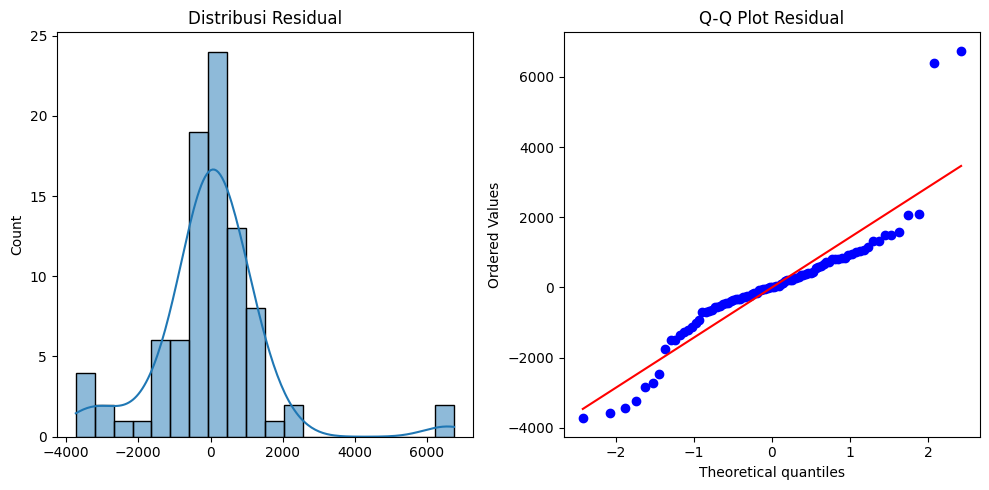

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(10, 5))

# Histogram dan KDE plot
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual")

# QQ-Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot Residual")

plt.tight_layout()
plt.show()

* Statistik K-S = 0.1431

* P-value = 0.0472 → < 0.05

Ini berarti residual tidak berdistribusi normal, dan asumsi normalitas tidak terpenuhi. Hal ini bisa mempengaruhi validitas inferensi (uji t dan F).

## Melakukan intepretasi model

* Model secara keseluruhan sangat kuat dan menjelaskan Revenue dengan baik.

* Hanya Direct yang signifikan secara individual.

* Terdapat masalah pada autokorelasi dan normalitas residual, serta indikasi heteroskedastisitas kecil.

* Model dapat digunakan untuk prediksi, namun hasil inferensial perlu ditafsirkan dengan hati-hati atau ditingkatkan dengan metode robust (misal: transformasi, HAC SE, atau ARIMA jika time-dependency kuat).

# **NOTED**

Pilihan antara **menggunakan semua variabel** atau hanya **yang signifikan (Direct)** bergantung pada tujuan analisis dan konteks praktisnya:

---

**Gunakan Semua Variabel Jika:**

1. **Tujuan utamanya adalah prediksi** revenue, bukan interpretasi.
2. Kamu ingin mempertahankan **informasi dari semua channel traffic** meskipun tidak semuanya signifikan secara statistik.
3. R² model yang sangat tinggi (97.2%) menandakan bahwa model tetap sangat kuat secara prediktif.
4. Model digunakan dalam konteks bisnis/data science, bukan laporan akademik yang ketat terhadap asumsi statistik.

➡️ **Keuntungan:** prediksi akurat
➡️ **Risiko:** interpretasi parsial bisa bias karena banyak variabel tidak signifikan.

---

**Gunakan Hanya yang Signifikan (Direct) Jika:**

1. Tujuanmu adalah **menganalisis pengaruh** atau membuat **kebijakan berdasarkan insight statistik**.
2. Kamu ingin model yang **lebih sederhana dan mudah ditafsirkan**.
3. Menghindari memasukkan noise atau variabel yang bisa memicu overfitting.

➡️ **Keuntungan:** hasil uji t valid dan mudah ditafsirkan
➡️ **Risiko:** model bisa kehilangan daya prediksi (R² turun)

---

**Rekomendasi:**

Kamu bisa gunakan dua versi:

* **Model Lengkap** → untuk prediksi revenue.
* **Model Sederhana (Direct saja)** → untuk membuat rekomendasi kebijakan atau interpretasi pengaruh.

## Model Lengkap

Berikut adalah **penulisan model regresi time series lengkap** berdasarkan hasil estimasi parameter seluruh variabel independen:

---

**Model Regresi Time Series (Lengkap)**

Adapun hasil analisis regresi time series yang telah dilakukan diperoleh model sebagai berikut:

$$
\text{Revenue}_t = 489{,}32 + 5{,}39 \cdot \text{Direct}_t + 1{,}14 \cdot \text{OrganicSearch}_t - 1{,}99 \cdot \text{OrganicSocial}_t - 14{,}73 \cdot \text{Referral}_t + 298{,}80 \cdot \text{Unassigned}_t - 190{,}31 \cdot \text{Display}_t - 432{,}84 \cdot \text{PaidSearch}_t + e_t
$$

Dengan:

* $\text{Revenue}_t$: Nilai pendapatan pada waktu ke-$t$
* $\text{Direct}_t$: Jumlah kunjungan dari direct channel
* $\text{OrganicSearch}_t$: Jumlah kunjungan dari pencarian organik
* $\text{OrganicSocial}_t$: Jumlah kunjungan dari media sosial organik
* $\text{Referral}_t$: Jumlah kunjungan dari sumber referral
* $\text{Unassigned}_t$: Jumlah kunjungan tidak terklasifikasi
* $\text{Display}_t$: Jumlah kunjungan dari iklan display
* $\text{PaidSearch}_t$: Jumlah kunjungan dari pencarian berbayar
* $e_t$: Residual atau galat model pada waktu ke-$t$

## Model Sederhana (Direct saja)

**Model Regresi Time Series Sederhana (Variabel Signifikan Saja)**

Berdasarkan hasil analisis regresi dan uji signifikansi, diperoleh model sederhana sebagai berikut:

$$
\text{Revenue}_t = 489{,}32 + 5{,}39 \cdot \text{Direct}_t + e_t
$$

Keterangan:

* $\text{Revenue}_t$: Pendapatan pada waktu ke-$t$
* $\text{Direct}_t$: Jumlah kunjungan dari channel direct pada waktu ke-$t$
* $e_t$: Error atau galat model pada waktu ke-$t$